<a href="https://colab.research.google.com/github/RahafSh/MachineLearning_IRIS/blob/main/Week05_IRIS_PROJECT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine Learning Module `Project Week 05`
#**Comparative Analysis of Machine Learning Models on the Iris Dataset**



#       Abeer Almisbahi - Rahaf Shiqdar - Lamia Alghamdi

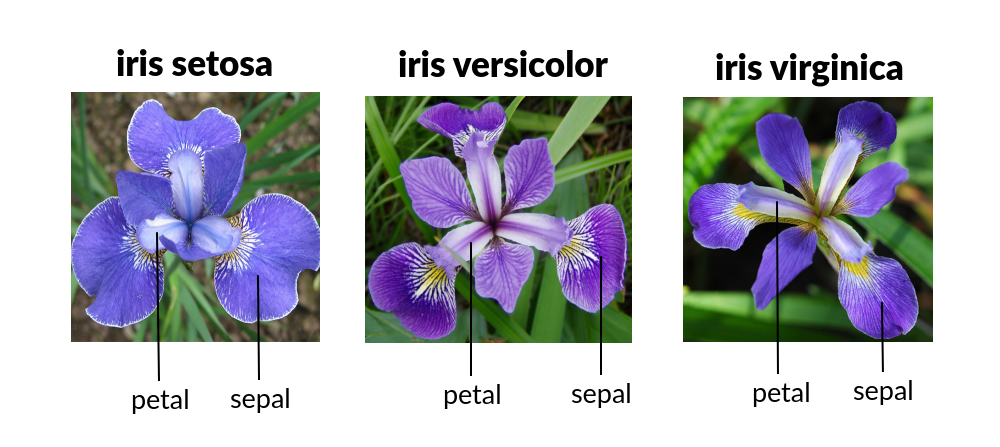

####**Loading the dataset:**  [Click here](https://archive.ics.uci.edu/ml/datasets/iris)
----
##**1. Data Preprocessing**
###    Import libraries & packages - Python


In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import datetime as dt # date time
import matplotlib.pyplot as plt # Visualization
import seaborn as sns # Visualization
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from sklearn.linear_model import LinearRegression
from sklearn.metrics import silhouette_score
from sklearn.ensemble import IsolationForest
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
#from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.ensemble import VotingClassifier
from sklearn.tree import DecisionTreeClassifier

 # magic command that allows plots generated by matplotlib to be displayed directly within the notebook
%matplotlib inline


      •	Load the Iris dataset.

### Install the ucimlrepo package

In [ ]:
pip install ucimlrepo

### Import the dataset


In [ ]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
iris = fetch_ucirepo(id=53)

# data (as pandas dataframes)
iris_features = iris.data.features
targets = iris.data.targets

# metadata
print(iris.metadata)

# variable information
print(iris.variables)

{'uci_id': 53, 'name': 'Iris', 'repository_url': 'https://archive.ics.uci.edu/dataset/53/iris', 'data_url': 'https://archive.ics.uci.edu/static/public/53/data.csv', 'abstract': 'A small classic dataset from Fisher, 1936. One of the earliest known datasets used for evaluating classification methods.\n', 'area': 'Biology', 'tasks': ['Classification'], 'characteristics': ['Tabular'], 'num_instances': 150, 'num_features': 4, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1936, 'last_updated': 'Tue Sep 12 2023', 'dataset_doi': '10.24432/C56C76', 'creators': ['R. A. Fisher'], 'intro_paper': {'title': 'The Iris data set: In search of the source of virginica', 'authors': 'A. Unwin, K. Kleinman', 'published_in': 'Significance, 2021', 'year': 2021, 'url': 'https://www.semanticscholar.org/paper/4599862ea877863669a6a8e63a3c707a787d5d7e', 'doi': '1740-9713.01589'}, 'add


      •	Perform data exploration and visualization.

In [ ]:
iris_features.head()

,sepal length,sepal width,petal length,petal width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
targets.head()

,class
0,Iris-setosa
1,Iris-setosa
2,Iris-setosa
3,Iris-setosa
4,Iris-setosa


In [ ]:
# creat DataFrame
iris_df = pd.DataFrame(data=iris_features, columns=iris.data.feature_names)
#Change column name from [class] into [species]
iris_df['species'] = targets

iris_df

,sepal length,sepal width,petal length,petal width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [ ]:
#Change columns name
iris_df.rename(columns={'sepal length': 'sepal_length','sepal width':'sepal_width','petal length': 'petal_length','petal width': 'petal_width'}, inplace=True)
iris_df.head(2)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa


In [ ]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [ ]:
iris_df.shape

(150, 5)

In [ ]:
iris_df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:
iris_df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')


      •	Check for missing values and handle them if any.

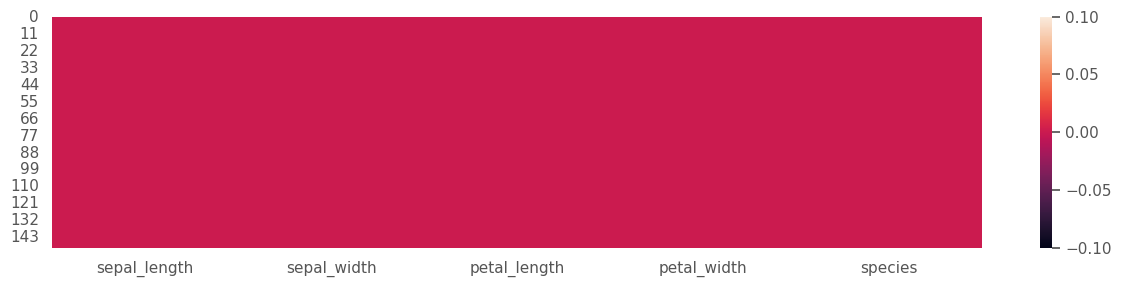

In [ ]:
# Check if there is any missing value through heatmap!
plt.rcParams['figure.figsize']=(15,3)
plt.style.use('ggplot')
sns.heatmap(iris_df.isnull(), cmap='rocket') # I couldn't do it on the merged table it crashed for huge data!
plt.show()

In [ ]:
iris_df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [ ]:
iris_df.duplicated().sum()

3

In [ ]:
iris_df = iris_df.drop_duplicates()
iris_df.dropna(inplace=False) # Drop rows that contains NAs, Note that now its a relatively small number of rows since we dropped the columns with large percentage of Nulls

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [ ]:
iris_df.duplicated().sum()

0

In [ ]:
iris_df.shape

(147, 5)

In [ ]:
iris_df.nunique()

sepal_length    35
sepal_width     23
petal_length    43
petal_width     22
species          3
dtype: int64

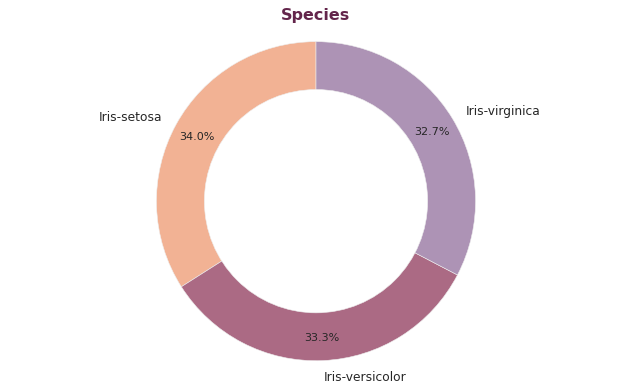

In [ ]:
# Pie chart

labels = iris_df['species'].unique()
sizes = iris_df['species'].value_counts()
colors = ['#f2b294', '#ab6a84', '#ad93b5']

fig, ax1 = plt.subplots(figsize=(8, 5), dpi=80)
plt.title('Species', color='#63254b', weight="bold")
wedges, texts, autotexts = ax1.pie(sizes, colors=colors, labels=labels, autopct='%1.1f%%', startangle=90, pctdistance=0.85)

# Draw circle
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig.gca().add_artist(centre_circle)

ax1.axis('equal')
plt.tight_layout()
plt.show()


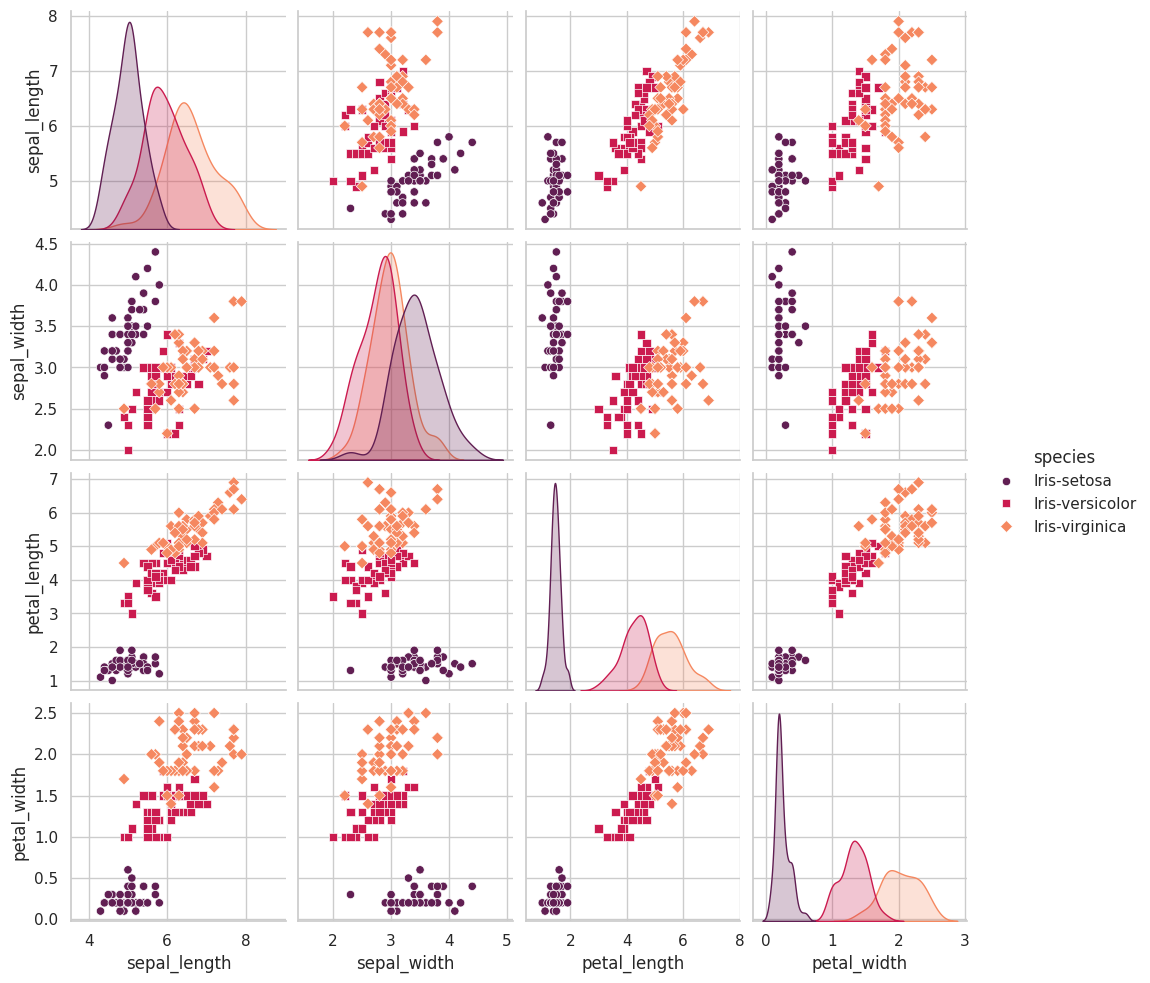

In [ ]:
sns.set(style="whitegrid")
sns.pairplot(iris_df, hue="species", palette="rocket", diag_kind="kde", markers=["o", "s", "D"])

#Remove the top and right spines from plot
sns.despine()
plt.show()

Multivariate Scatter Plot helps us to visualize the pair-wise relationship in our dataset.



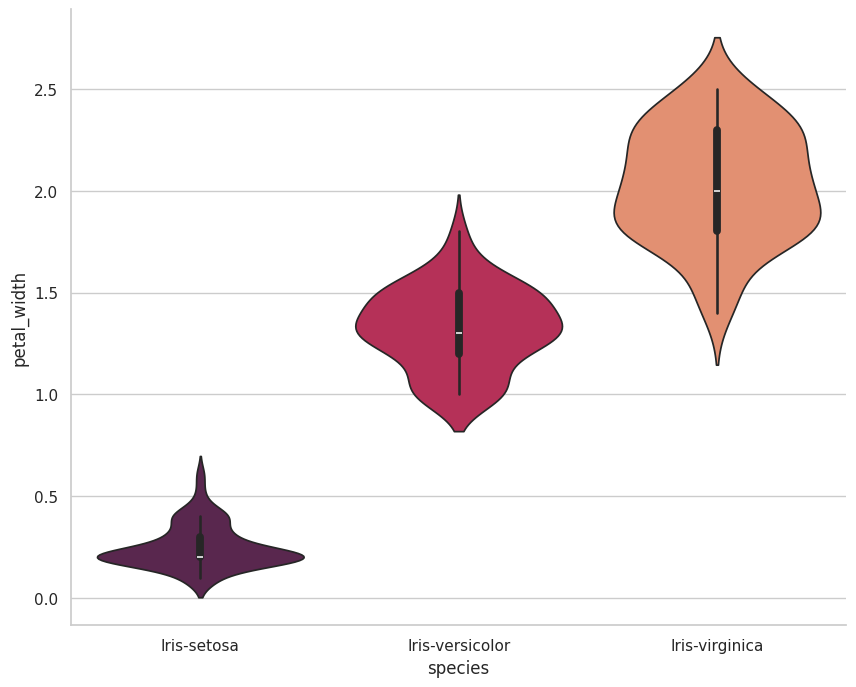

In [ ]:
sns.set(style="whitegrid", palette="GnBu_d", rc={'figure.figsize':(10,8)})
sns.violinplot(x=iris_df.species, y=iris_df.petal_width, hue=iris_df.species, palette="rocket")

sns.despine()
plt.show()

Petal Width depends on each specie.

In [ ]:
# Plotly
fig_boxplot = px.box(iris_df, x="species", y="sepal_width", title="Box Plot of Sepal Width by Species",
                     color='species',
                     color_discrete_sequence=colors
                    )
fig_boxplot.update_layout(xaxis_title="Species", yaxis_title="Sepal Width", plot_bgcolor='#f0f0f0')

fig_boxplot.show()


Create a box plot to show the relationship between a numerical variable and a categorical variable


##**2. Unsupervised Learning: Clustering and Outlier Detection**


 Numeric Values


      •	Apply K-means clustering algorithm to cluster the data.

In [ ]:
# Values ​​available in target column
target_values = iris_df['species'].unique()

# Generate numeric values ​​based on the available values
target_mapping = {val: idx for idx, val in enumerate(target_values)}

# Converting target column from object values ​​to numeric
iris_df['species'] = iris_df['species'].map(target_mapping)
#iris_df.loc[:, 'species'] = iris_df['species'].map(target_mapping)

iris_df.sample(5)

<ipython-input-56-3b2a0bf5f4e4>:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,sepal_length,sepal_width,petal_length,petal_width,species
148,6.2,3.4,5.4,2.3,2
54,6.5,2.8,4.6,1.5,1
76,6.8,2.8,4.8,1.4,1
96,5.7,2.9,4.2,1.3,1
19,5.1,3.8,1.5,0.3,0



      •	Apply K-means clustering algorithm to cluster the data.

In [ ]:
# LinearRegression

# Create a linear regression model
linear_reg_model = LinearRegression()

# Training the model on the data
linear_reg_model.fit(iris_df,iris_df['species'])

# Extraction of the slope coefficient (slope of the line)
slope = linear_reg_model.coef_

# If the relationship is linear, then the slope of the line will be different from zero
if (slope != 0).any():
    print("The relationship between the variables is linear.")
else:
    print("The relationship between variables is nonlinear.")

The relationship between the variables is linear.


In [ ]:
iris_un = iris_df.loc[:, ['sepal_length', 'sepal_width']]

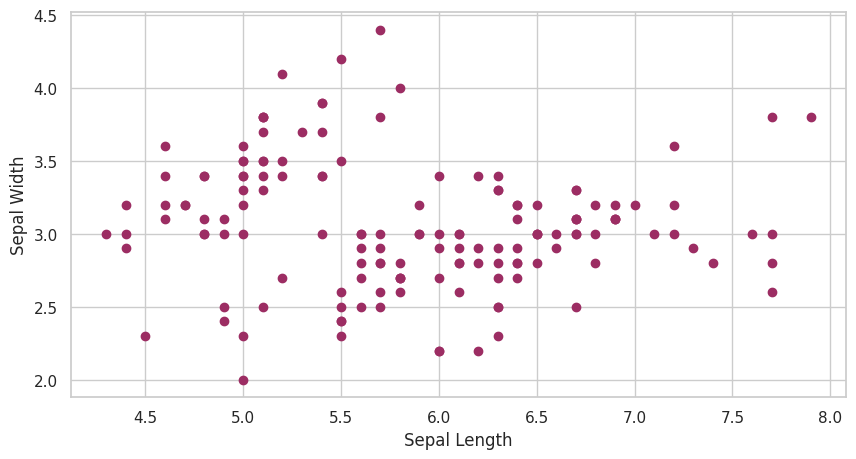

In [ ]:
plt.figure(figsize=(10, 5))
plt.scatter(x = iris_un['sepal_length'], y = iris_un['sepal_width'], c='#9c2d63')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.show()

In [ ]:
# KMeans
km = KMeans(n_clusters = 3, n_init=10)
km.fit(iris_un)

KMeans(n_clusters=3, n_init=10)

In [ ]:
y_pred = km.predict(iris_un)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 2, 1, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1,
       1, 2, 2, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1, 1, 2,
       2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2], dtype=int32)

In [ ]:
km.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 2, 1, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1,
       1, 2, 2, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1, 1, 2,
       2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2], dtype=int32)

In [ ]:
km.predict([[100, 3]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but KMeans was fitted with feature names



array([1], dtype=int32)

In [ ]:
wcss = [] #Within cluster sum squares
seed = 0
for i in range(1,11):
    km = KMeans(n_clusters= i, random_state=seed, n_init=10)
    km.fit(iris_un)
    wcss.append(km.inertia_)

In [ ]:
wcss

[128.24394557823126,
 57.2556063432836,
 36.888849563557,
 27.826028637594185,
 20.850449927806167,
 17.15772177098264,
 14.550084857895726,
 12.593643210298472,
 11.052926948782215,
 9.721997754305942]

In [ ]:
km = KMeans(n_clusters = len(iris_df))
km.fit(iris_un)
km.inertia_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

<ipython-input-66-b05c98e00ebd>:2: ConvergenceWarning:

Number of distinct clusters (116) found smaller than n_clusters (147). Possibly due to duplicate points in X.



0.0


      •	Visualize the clusters.

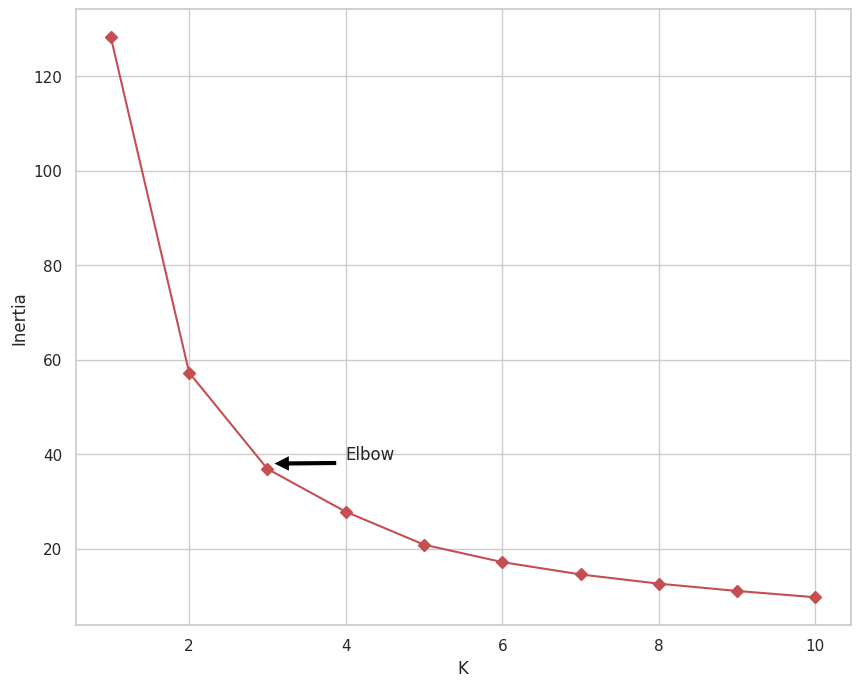

In [ ]:
plt.plot(range(1,11), wcss, 'Dr-')
plt.annotate('Elbow', xy=(3, 38), xytext=(4, 39), arrowprops=dict(facecolor='black', shrink=0.07))
plt.xlabel("K")
plt.ylabel("Inertia");

In [ ]:
# silhouette_score

km = KMeans(n_clusters = 2)
km.fit(iris_un)
silhouette_score(iris_un, km.labels_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



0.46298254816166373

In [ ]:
sil_scores = []
seed = 0

for i in range(2,10):
    km = KMeans(n_clusters= i, random_state=seed, n_init=10)
    km.fit(iris_un)
    sil_scores.append(silhouette_score(iris_un, km.labels_))

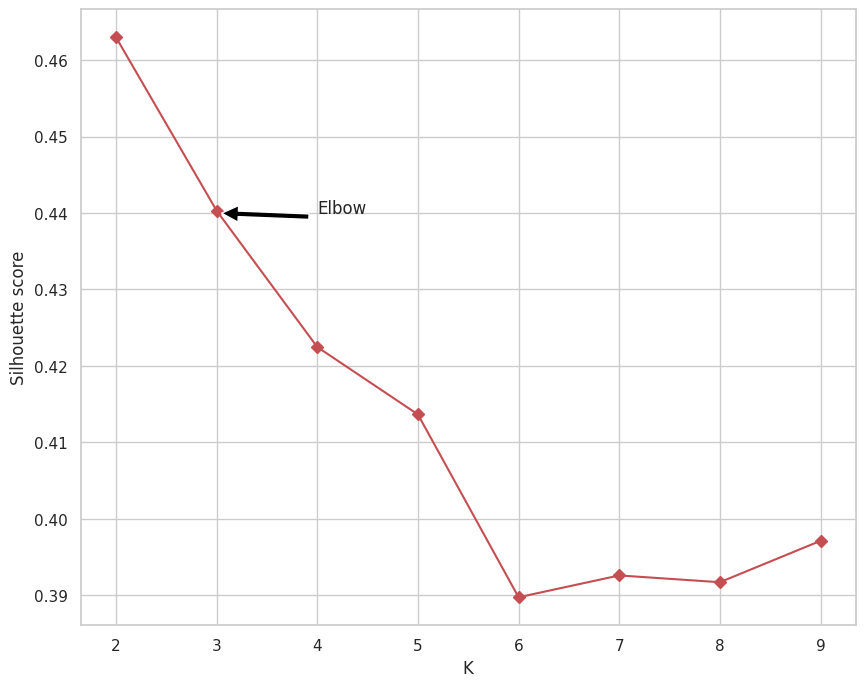

In [ ]:
plt.plot(range(2,10), sil_scores, 'Dr-')
plt.annotate('Elbow', xy=(3, 0.44), xytext=(4, 0.44), arrowprops=dict(facecolor='black', shrink=0.05))
plt.xlabel("K")
plt.ylabel("Silhouette score");

In [ ]:
iris_df.loc[:, 'cluster'] = km.labels_

<ipython-input-71-3af61188260c>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
'species' in iris_df.columns

True

In [ ]:
value_counts = iris_df['species'].value_counts()
print("Value counts for each unique value in the column:")
print(value_counts)

Value counts for each unique value in the column:
species
1    50
2    49
0    48
Name: count, dtype: int64


In [ ]:
iris_df[iris_df['cluster'] == 5].species.value_counts(normalize=True)

species
1    0.714286
0    0.142857
2    0.142857
Name: proportion, dtype: float64

In [ ]:
km = KMeans(n_clusters = 3, n_init=10)
km.fit(iris_un)

KMeans(n_clusters=3, n_init=10)

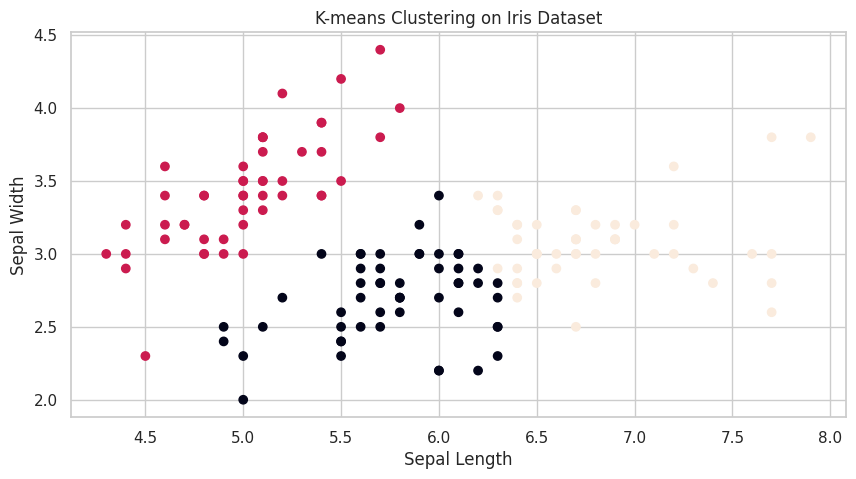

In [ ]:
plt.figure(figsize=(10,5))
plt.scatter(iris_un.iloc[:, 0], iris_un.iloc[:, 1], c= km.labels_)
plt.title('K-means Clustering on Iris Dataset')

plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width');

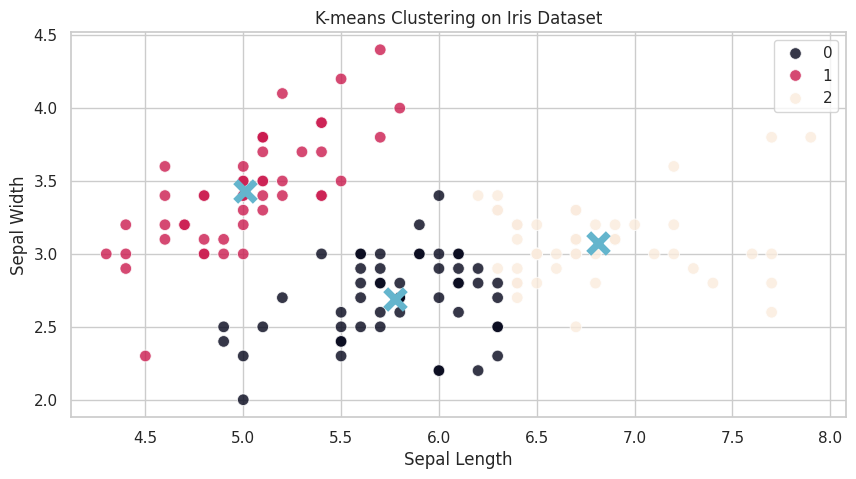

In [ ]:
k = 3

# Initialize KMeans model
kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)

# Fit the model to the data (excluding 'species' column)
kmeans.fit(iris_un)

# Get cluster labels
cluster_labels = km.labels_

# Visualize the clusters
plt.figure(figsize=(10, 5))
sns.scatterplot(x=iris_un.iloc[:, 0], y=iris_un.iloc[:, 1], hue=cluster_labels, palette='rocket', s=70, alpha=0.8, edgecolor='w')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='x', c='c', s=200, linewidths=5)
plt.title('K-means Clustering on Iris Dataset')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.legend(loc='best')
plt.grid(True)
plt.show()



      • Detect outliers using appropriate techniques such as isolation forest or DBSCAN.

In [ ]:
# Detect outliers using Isolation Forest

clf = IsolationForest(random_state=42)
clf.fit(iris_un)
outliers = clf.predict(iris_un)
print(outliers)
# -1 means the value is outliers

[ 1  1  1 -1  1 -1 -1  1 -1  1  1  1  1 -1 -1 -1 -1  1 -1  1  1  1 -1  1
  1  1  1  1  1  1  1  1 -1 -1  1  1 -1  1  1 -1 -1  1  1  1  1  1  1  1
  1  1  1 -1  1  1  1 -1  1  1 -1  1 -1  1  1  1  1  1 -1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1 -1  1  1  1  1  1 -1  1  1  1  1
  1  1  1  1  1  1  1 -1 -1 -1 -1 -1  1  1  1  1  1  1  1 -1 -1 -1  1  1
 -1  1  1 -1  1  1  1  1 -1 -1  1  1  1 -1  1  1  1  1  1  1  1  1  1  1
  1  1  1]


In [ ]:
# DBSCAN

model = DBSCAN(eps=0.3, min_samples=4)
model = model.fit(iris_un)

In [ ]:
model.labels_

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1, -1,  0,
        0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,
        0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,  1,
        1,  1,  1,  1,  2,  1,  2,  2,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  2,  1,  1,  1,  1,  2,  1,  1,  1,  1,  1,
        1,  1,  2,  1, -1, -1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1])

In [ ]:
model.core_sample_indices_

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  16,  17,  19,  20,  21,  22,  23,  24,  25,  26,  27,  28,
        29,  30,  31,  34,  35,  36,  37,  38,  40,  41,  42,  43,  44,
        45,  46,  47,  48,  49,  50,  51,  52,  53,  54,  55,  56,  59,
        61,  62,  63,  64,  65,  66,  67,  68,  69,  70,  71,  72,  73,
        74,  75,  76,  77,  78,  79,  80,  81,  82,  83,  84,  85,  86,
        87,  88,  89,  90,  91,  92,  93,  94,  95,  96,  97,  98,  99,
       100, 101, 102, 103, 104, 105, 108, 109, 110, 111, 112, 113, 114,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 130, 131,
       132, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145,
       146])

In [ ]:
set(model.labels_)

{-1, 0, 1, 2}

In [ ]:
n_clusters_ = len(set(model.labels_)) - (1 if -1 in model.labels_ else 0)
n_noise_ = list(model.labels_).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)

Estimated number of clusters: 3
Estimated number of noise points: 9



      • Evaluate the clustering results.

The average silhouette score is: 0.8469881221532085


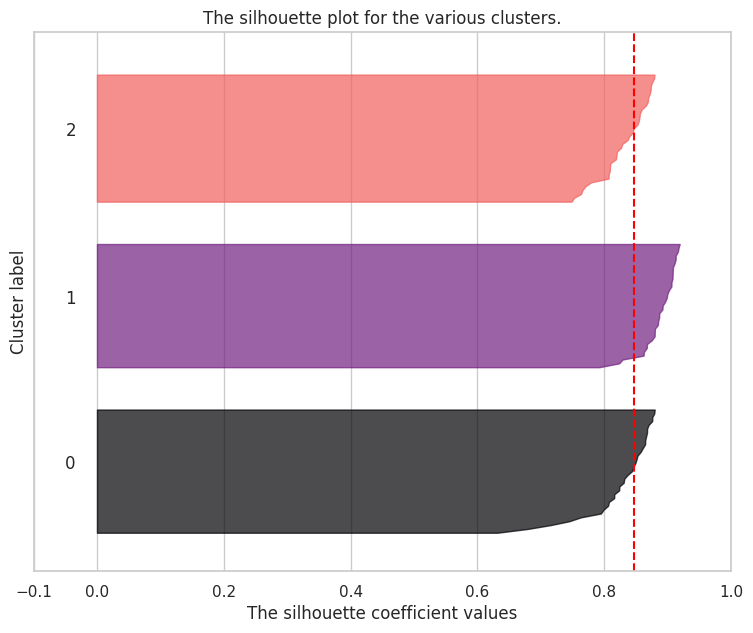

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

# Generate random data using make_blobs
iris_features, targets = make_blobs(random_state=42)

# Fit KMeans clustering with 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
cluster_labels = kmeans.fit_predict(iris_features)

# Compute silhouette scores
silhouette_avg = silhouette_score(iris_features, cluster_labels)
print(f"The average silhouette score is: {silhouette_avg}")# The result indicates that the clustering has received a good rating, as the value is close to 1.

# Compute silhouette scores for each sample
sample_silhouette_values = silhouette_samples(iris_features, cluster_labels)

# Create a silhouette plot
fig, ax1 = plt.subplots(1, 1)
fig.set_size_inches(9, 7)

# Set properties for silhouette plot
ax1.set_xlim([-0.1, 1])
ax1.set_ylim([0, len(iris_features) + (3 + 1) * 10])

y_lower = 10
for i in range(3):
    # Aggregate the silhouette scores for samples belonging to cluster i
    ith_cluster_silhouette_values = \
        sample_silhouette_values[cluster_labels == i]

    ith_cluster_silhouette_values.sort()

    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    color = plt.cm.magma(float(i) / 3)
    ax1.fill_betweenx(np.arange(y_lower, y_upper),
                      0, ith_cluster_silhouette_values,
                      facecolor=color, edgecolor=color, alpha=0.7)

    # Label the silhouette plots with their cluster numbers at the middle
    ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

    # Compute the new y_lower for next plot
    y_lower = y_upper + 10

ax1.set_title("The silhouette plot for the various clusters.")
ax1.set_xlabel("The silhouette coefficient values")
ax1.set_ylabel("Cluster label")

# The vertical line for average silhouette score of all the values
ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

ax1.set_yticks([])  # Clear the yaxis labels / ticks
ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

plt.show()


##**3. Supervised Learning: Baseline Model**


      • Choose an appropriate evaluation metric based on the problem (classification).

In [ ]:
# Step 1: Choose an appropriate evaluation metric (accuracy)
evaluation_metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']


      • Split the dataset into training and testing sets.

In [ ]:
# Step 2: Split the dataset into training and testing sets
from sklearn.model_selection import train_test_split

scaler = StandardScaler()
iris_df_scaled = scaler.fit_transform(iris_df.drop('species', axis=1))
X_train, X_test, y_train, y_test = train_test_split(iris_df_scaled, iris_df['species'], test_size=0.2, random_state=42)

In [ ]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
#iris_df_scaled = scaler.fit_transform(iris_df.drop('species', axis=1))


      • Build a baseline model (e.g., logistic regression or decision tree) using default parameters.

In [ ]:
# Step 3: Build a baseline model using default parameters
from sklearn.linear_model import LogisticRegression

baseline_model = LogisticRegression(solver="lbfgs", random_state=42)
baseline_model.fit(X_train_scaled, y_train)

LogisticRegression(random_state=42)


      • Evaluate the baseline model's performance.

In [ ]:
y_test_pred = baseline_model.predict(X_test_scaled)
y_train_pred = baseline_model.predict(X_train_scaled)

In [ ]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

print("Training Model \n ------------------")

for metric in evaluation_metrics:
    if metric == 'Accuracy':
        train_accuracy = accuracy_score(y_train, y_train_pred)
        print(f"Train Accuracy: {train_accuracy: .3f}")

    elif metric == 'Precision':
        train_precision = precision_score(y_train, y_train_pred, average='weighted')
        print(f"Train Precision: {train_precision: .3f}")

    elif metric == 'Recall':
        train_recall = recall_score(y_train, y_train_pred, average='weighted')
        print(f"Train Recall: {train_recall: .3f}")

    elif metric == 'F1 Score':
        train_f1_score = f1_score(y_train, y_train_pred, average='weighted')
        print(f"Train F1 Score: {train_f1_score: .3f}")
    else:
        print("Invalid evaluation metric.")


Training Model 
 ------------------
Train Accuracy:  0.974
Train Precision:  0.975
Train Recall:  0.974
Train F1 Score:  0.974


In [ ]:
print("Testing Model \n ------------------")

for metric in evaluation_metrics:
    if metric == 'Accuracy':
        test_accuracy = accuracy_score(y_test, y_test_pred)
        print(f"Test Accuracy: {test_accuracy: .3f}")


    elif metric == 'Precision':
        test_precision = precision_score(y_test, y_test_pred, average='weighted')
        print(f"Test Precision: {test_precision: .3f}")

    elif metric == 'Recall':
        test_recall = recall_score(y_test, y_test_pred, average='weighted')
        print(f"Test Recall: {test_recall: .3f}")

    elif metric == 'F1 Score':
        test_f1_score = f1_score(y_test, y_test_pred, average='weighted')
        print(f"Test F1 Score: {test_f1_score: .3f}")
    else:
        print("Invalid evaluation metric.")


Testing Model 
 ------------------
Test Accuracy:  0.967
Test Precision:  0.970
Test Recall:  0.967
Test F1 Score:  0.967


In [ ]:
# Consider other factors
print("\nOther Factors\n----------")
print(f"Training Dataset Size: {len(X_train)}")
print(f"Testing Dataset Size: {len(X_test)}")
print(f"Number of Features: {iris_df_scaled.shape[1]}") # Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'cluster']



Other Factors
----------
Training Dataset Size: 117
Testing Dataset Size: 30
Number of Features: 5


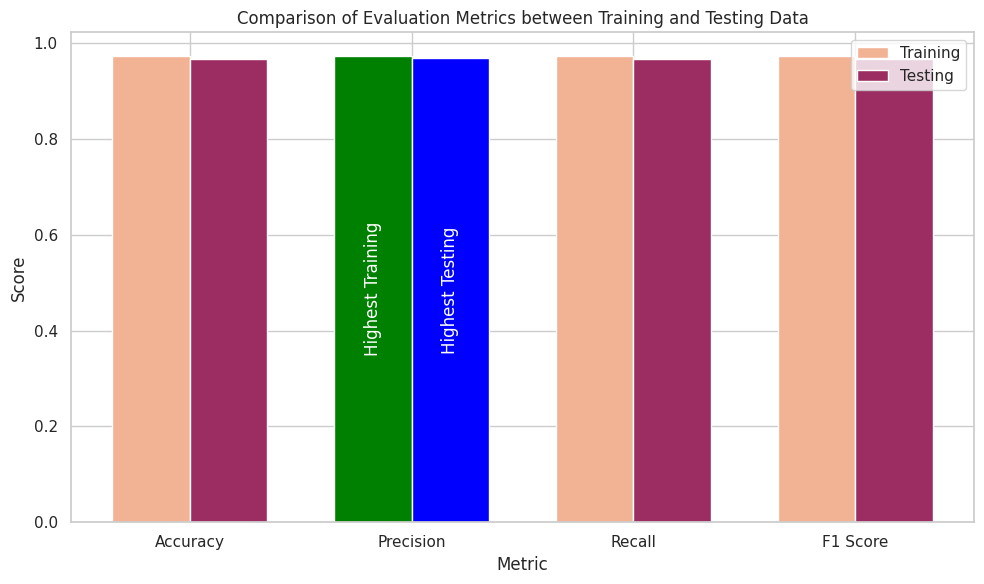

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Define evaluation metrics
evaluation_metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']

# Initialize lists to store metric values for training and testing
train_metric_values = []
test_metric_values = []

# Calculate evaluation metrics for training data
for metric in evaluation_metrics:
    if metric == 'Accuracy':
        train_metric_values.append(accuracy_score(y_train, y_train_pred))
    elif metric == 'Precision':
        train_metric_values.append(precision_score(y_train, y_train_pred, average='weighted'))
    elif metric == 'Recall':
        train_metric_values.append(recall_score(y_train, y_train_pred, average='weighted'))
    elif metric == 'F1 Score':
        train_metric_values.append(f1_score(y_train, y_train_pred, average='weighted'))
    else:
        print("Invalid evaluation metric.")

# Calculate evaluation metrics for testing data
for metric in evaluation_metrics:
    if metric == 'Accuracy':
        test_metric_values.append(accuracy_score(y_test, y_test_pred))
    elif metric == 'Precision':
        test_metric_values.append(precision_score(y_test, y_test_pred, average='weighted'))
    elif metric == 'Recall':
        test_metric_values.append(recall_score(y_test, y_test_pred, average='weighted'))
    elif metric == 'F1 Score':
        test_metric_values.append(f1_score(y_test, y_test_pred, average='weighted'))
    else:
        print("Invalid evaluation metric.")

# Find the index of the maximum values for both training and testing metrics
best_train_index = np.argmax(train_metric_values)
best_test_index = np.argmax(test_metric_values)

# Visualize the comparison of evaluation metrics between training and testing data
bar_width = 0.35
index = np.arange(len(evaluation_metrics))

plt.figure(figsize=(10, 6))

for i, metric in enumerate(evaluation_metrics):
    train_color = '#f2b294' if i != best_train_index else 'green'
    test_color = '#9c2d63' if i != best_test_index else 'blue'
    plt.bar(index[i], train_metric_values[i], bar_width, color=train_color)
    plt.bar(index[i] + bar_width, test_metric_values[i], bar_width, color=test_color)

    # Add "Training" and "Testing" labels inside the bars with white color at the middle center
    if i == best_train_index:
        plt.text(index[i] + 0 * bar_width / 2, train_metric_values[i] / 2, 'Highest Training', rotation=90, ha='center', va='center', color='white')
    if i == best_test_index:
        plt.text(index[i] + 2 * bar_width / 2, test_metric_values[i] / 2, 'Highest Testing', rotation=90, ha='center', va='center', color='white')

plt.xlabel('Metric')
plt.ylabel('Score')
plt.title('Comparison of Evaluation Metrics between Training and Testing Data')
plt.xticks(index + bar_width / 2, evaluation_metrics)
plt.legend(['Training', 'Testing'], loc='upper right')
plt.tight_layout()
plt.show()


##**4. Model Comparison**


      • Select 3-4 machine learning algorithms (e.g., SVM, Random Forest, Gradient Boosting) suitable for the problem.
      
      • Implement each algorithm and evaluate its performance using cross-validation.
      
      • Compare the performance of algorithms based on evaluation metrics.
      
      • Select the best-performing algorithm.

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

# 1. Select 3-4 machine learning algorithms
modelz = {
    "SVM ": SVC(),
    "Random Forest ": RandomForestClassifier(),
    "Gradient Boosting ": GradientBoostingClassifier()

}


# 3. Compare the performance of algorithms based on evaluation metric
evaluation_metric = ['accuracy']
for metric in evaluation_metric:
    print(f"\n -- Comparing models based on {metric} --\n")
    for name, model in modelz.items():
        scores = cross_val_score(model, X_train, y_train, cv=5, scoring=metric)
        print(f"\n{name}: Mean {metric.capitalize()} = {scores.mean():.4f} | Std Deviation = {scores.std():.4f}")


# 4. Select the best-performing algorithm
best_model_name = max(modelz, key=lambda k: cross_val_score(modelz[k],  X_train, y_train, cv=5, scoring='accuracy').mean())
print(f"-----------------------------------\nThe best-performing algorithm based on mean accuracy is: {best_model_name}")


 -- Comparing models based on accuracy --


SVM : Mean Accuracy = 0.9406 | Std Deviation = 0.0337

Random Forest : Mean Accuracy = 0.9659 | Std Deviation = 0.0170

Gradient Boosting : Mean Accuracy = 0.9486 | Std Deviation = 0.0428
-----------------------------------
The best-performing algorithm based on accuracy is: Random Forest 


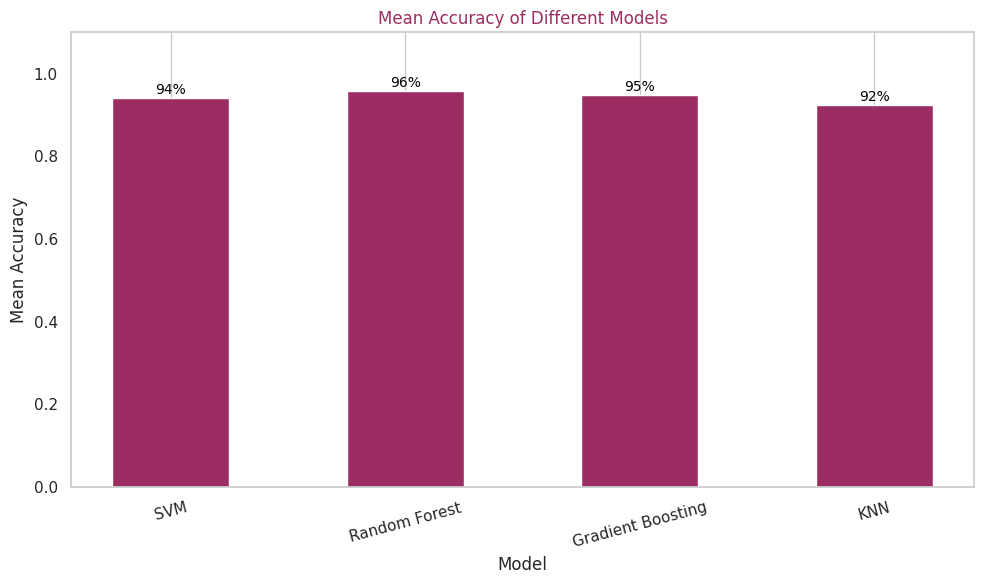

In [ ]:
# Define the models
modelz = {
    "SVM": SVC(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": XGBClassifier(),
    "KNN": KNeighborsClassifier()
}

# Initialize lists to store model names and mean accuracy scores
model_names = []
mean_accuracies = []

# Evaluate each model and store mean accuracy
for name, model in modelz.items():
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
    model_names.append(name)
    mean_accuracies.append(scores.mean())

# Plotting the mean accuracy of each model
plt.figure(figsize=(10, 6))

# Plot each bar with thinner width
bar_width = 0.5
bar_positions = range(len(model_names))

plt.bar(bar_positions, mean_accuracies, color='#9c2d63', width=bar_width)

# Annotate each bar with its accuracy percentage
for i, acc in enumerate(mean_accuracies):
    plt.text(i, acc + 0.01, f'{acc*100:.0f}%', ha='center', color='black', fontsize=10)

plt.title('Mean Accuracy of Different Models', color='#9c2d63')
plt.xlabel('Model')
plt.ylabel('Mean Accuracy')
plt.ylim(0, 1.1)  # Set y-axis limit from 0 to 1
plt.xticks(bar_positions, model_names, rotation=15)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


##**5. Model Tuning and Ensemble**




      • Perform hyperparameter tuning on the best-performing algorithm using Grid Search or Random Search.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [80, 90, 100, 110],
    'max_features': ['sqrt', 'log2'],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}

In [ ]:
rf = RandomForestClassifier(random_state=91)

In [ ]:
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1)

In [ ]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=91), n_jobs=-1,
             param_grid={'max_depth': [80, 90, 100, 110],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_split': [8, 10, 12],
                         'n_estimators': [100, 200, 300, 1000]})

In [ ]:
best_params = grid_search.best_params_
best_rf = grid_search.best_estimator_

In [ ]:
best_rf

RandomForestClassifier(max_depth=80, min_samples_split=8, random_state=91)

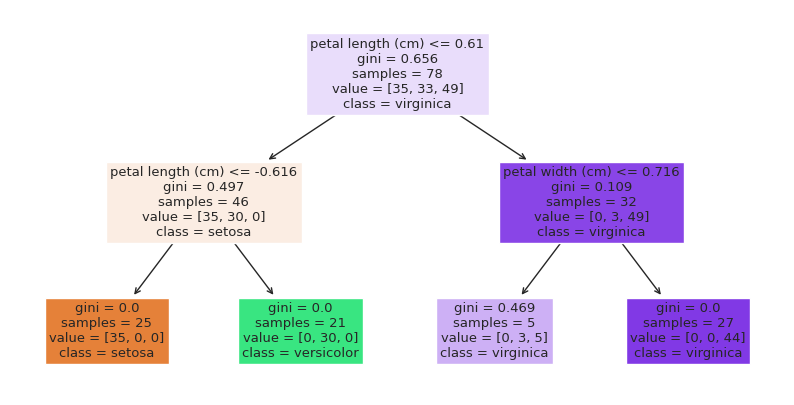

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree

clf = best_rf

tree_to_plot = clf.estimators_[0]

plt.figure(figsize=(10, 5))
tree.plot_tree(tree_to_plot, filled=True, feature_names=iris.feature_names, class_names=iris.target_names)
plt.show()


      • Evaluate the tuned model's performance.

In [ ]:
y_pred = best_rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.93


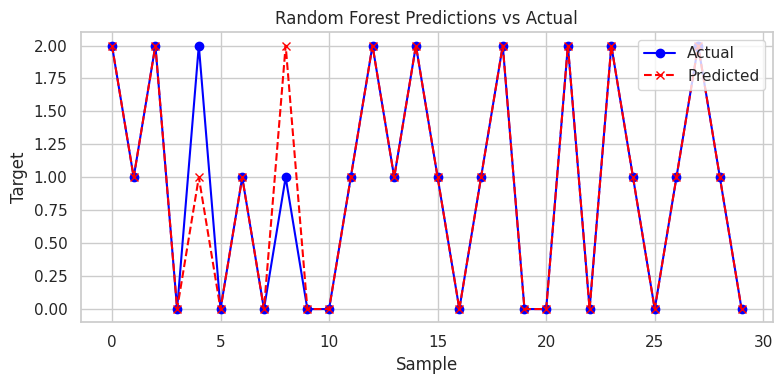

In [ ]:
# Plot the actual values and predicted values
plt.figure(figsize=(8, 4))
plt.plot(range(len(y_test)), y_test, marker='o', color='blue', label='Actual')
plt.plot(range(len(y_pred)), y_pred, marker='x', color='red', linestyle='dashed', label='Predicted')
plt.title('Random Forest Predictions vs Actual')
plt.xlabel('Sample')
plt.ylabel('Target')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


Test Accuracy of Tuned Model: 0.9333
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       0.90      0.90      0.90        10
           2       0.89      0.89      0.89         9

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30



<Figure size 1000x800 with 0 Axes>

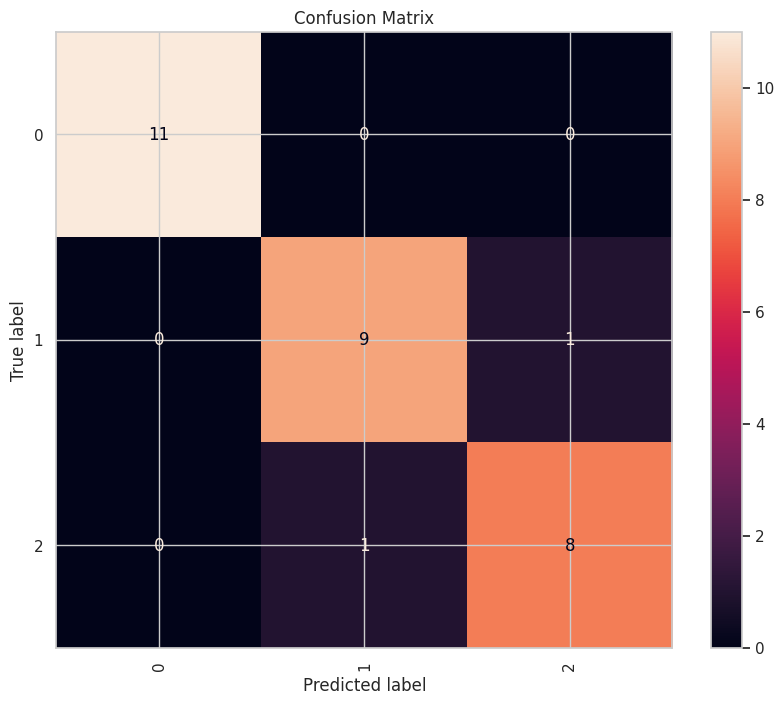

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

# Fit the tuned model on the training data
rf.fit(X_train, y_train)

# Predict on the test data
y_pred = rf.predict(X_test)

# Evaluate the predictions
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Test Accuracy of Tuned Model: {accuracy:.4f}')

# Generate classification report
report = classification_report(y_test, y_pred)
print('Classification Report:\n', report)

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix with a custom color map
plt.figure(figsize=(10, 8))  # Adjust the size as needed
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf.classes_)
disp.plot(xticks_rotation="vertical", cmap='rocket')  # Change 'Blues' to any colormap of your choice
plt.title("Confusion Matrix")
plt.show()



      • Implement an ensemble of the top-performing algorithms and compare its performance with the tuned model.

In [ ]:
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score



# Step 3: Train the Individual Models
RF = RandomForestClassifier()
RF.fit(X_train, y_train)

logreg = LogisticRegression()
logreg.fit(X_train, y_train)

dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

# Step 4: Implement Ensemble of the Top-Performing Algorithms
ensemble = VotingClassifier(estimators=[('RF', RF), ('logreg', logreg), ('dt', dt)], voting='hard')
ensemble.fit(X_train, y_train)

# Step 5: Compare Performance of Ensemble and Tuned Model
y_pred_ensemble = ensemble.predict(X_test)
accuracy_ensemble = accuracy_score(y_test, y_pred_ensemble)
print("Ensemble Model Accuracy: {:.2f}".format(accuracy_ensemble))

# Assuming "tuned_model" is the previously tuned model
tuned_model = RandomForestClassifier()
tuned_model.fit(X_train, y_train)
y_pred_tuned = tuned_model.predict(X_test)
accuracy_tuned = accuracy_score(y_test, y_pred_tuned)
print("Tuned Model Accuracy: {:.2f}".format(accuracy_tuned))

Ensemble Model Accuracy: 0.93
Tuned Model Accuracy: 0.93


# **Save Cleaned Data and Download it**

In [ ]:
iris_df.to_csv('Iris_New.csv', index=False)

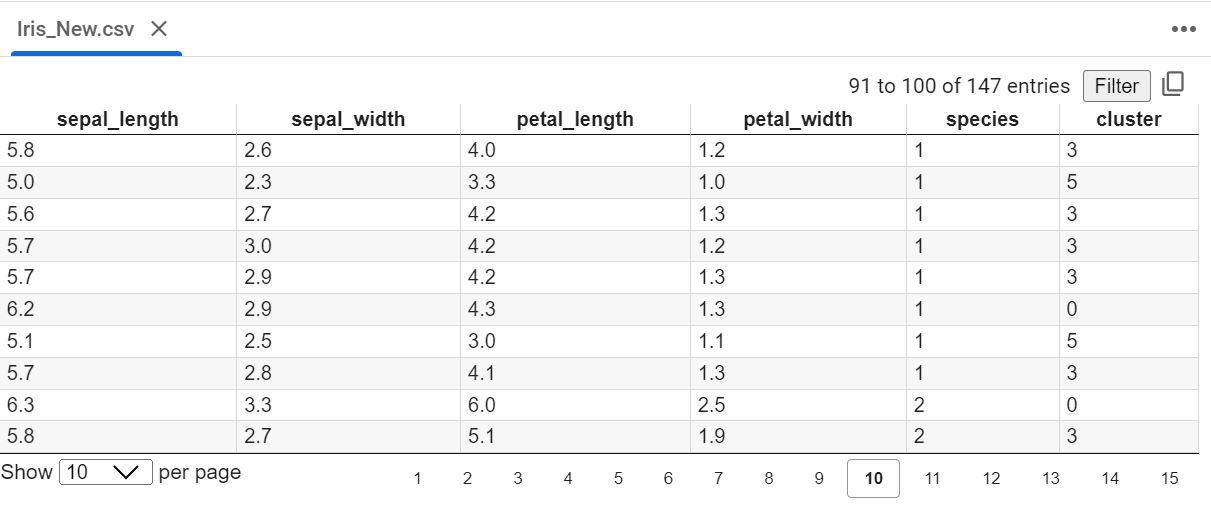